# Clustering

## K-Mean Algorithm

### Introduction to K-Mean

K-Mean algorithm is one of the most popular clustering algo.  
Select clustering centroid and find points that are the nearest to centroid.  

Pros  
1. Most popular clustering algo.  
2. Easy and Simple algo.  

Cons  
1. Distance based algo. -> if there are too many features, may lead to poor clustering performance.(May need PCA for dimension reduction)  
2. If there are numerous iteration, it takes long time.  
3. Hard to choose # of cluster

### SKlearn KMean Class

Parameters  
- n_clusters[default=8]: select # of cluster  
- init[default=k-means++]: select initial centriod positioning method  
- max_iter[default=300]: # of maximum iteration. If there're no more centroid movement, iteration can be stopped before max_iter  

Attributes  
- labels_: Clustering Centroid Label for each data  
- cluster_centers_: Coordinates of each centroid. Can visualize where are centroids

### Clustering Iris data using K-Mean

In [1]:
from sklearn.preprocessing import scale
from sklearn.datasets import load_iris
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
%matplotlib inline

iris = load_iris()
iris_df = pd.DataFrame(data=iris.data, columns=iris.feature_names)
iris_df.head(3)

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2


In [2]:
kmeans = KMeans(n_clusters=3)
kmeans.fit(iris_df)

KMeans(n_clusters=3)

In [3]:
print(kmeans.labels_)

[1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 0 0 2 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 2 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 2 0 2 2 2 2 0 2 2 2 2
 2 2 0 0 2 2 2 2 0 2 0 2 0 2 2 0 0 2 2 2 2 2 0 2 2 2 2 0 2 2 2 0 2 2 2 0 2
 2 0]


In [7]:
iris_df['target'] = iris.target
iris_df['cluster']=kmeans.labels_
# Use groupby method to check consistency of target and cluster
iris_result = iris_df.groupby(['target','cluster'])['sepal length (cm)'].count()
print(iris_result)

target  cluster
0       1          50
1       0          48
        2           2
2       0          14
        2          36
Name: sepal length (cm), dtype: int64


In [ ]:
# Good performance for target 0,1(100%, 96%) but poor performance for target 2(72%)

In [8]:
# Before visualization, apply PCA(n_components=2) to make 2D plot
from sklearn.decomposition import PCA

pca = PCA(n_components=2)
pca_transformed = pca.fit_transform(iris.data)

iris_df['pca_x'] = pca_transformed[:,0]
iris_df['pca_y'] = pca_transformed[:,1]
iris_df.head(3)

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target,cluster,pca_x,pca_y
0,5.1,3.5,1.4,0.2,0,1,-2.684126,0.319397
1,4.9,3.0,1.4,0.2,0,1,-2.714142,-0.177001
2,4.7,3.2,1.3,0.2,0,1,-2.888991,-0.144949


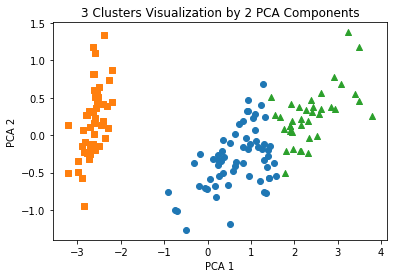

In [9]:
# Cluster Index
marker0_ind = iris_df[iris_df['cluster']==0].index
marker1_ind = iris_df[iris_df['cluster']==1].index
marker2_ind = iris_df[iris_df['cluster']==2].index

# Using cluster index, extract pca_x, pca_y and draw scatter plot
plt.scatter(x=iris_df.loc[marker0_ind,'pca_x'], y=iris_df.loc[marker0_ind,'pca_y'], marker='o') 
plt.scatter(x=iris_df.loc[marker1_ind,'pca_x'], y=iris_df.loc[marker1_ind,'pca_y'], marker='s')
plt.scatter(x=iris_df.loc[marker2_ind,'pca_x'], y=iris_df.loc[marker2_ind,'pca_y'], marker='^')

plt.xlabel('PCA 1')
plt.ylabel('PCA 2')
plt.title('3 Clusters Visualization by 2 PCA Components')
plt.show()

### Data Generation for Clustering Algorithm Test

Simple Data Generator in Sklearn module to test Clustering Algorithm: make_blobs(), make_classification()  
- make_blobs include centroid/sd control function  
- make_classification include noise generating function  

Difficult Data Generator in Sklearn module to test Clustering Algorithm: make_circle(), make_moon()

Parameters of make_blobs  
- n_samples[Default=100]: # of total data generation  
- n_features[Default=2]: # of features of dataset  
- centers[int or ndarry of shape, Default=None]: # of centers to generate, or the fixed center locations.  
- cluster_std[Default=1.0]: standard deviation of the clusters.

In [10]:
from sklearn.datasets import make_blobs

# make_blobs return feature dataset and target dataset
X, y = make_blobs(n_samples=200, n_features=2, centers=3, cluster_std=0.8)
print(X.shape, y.shape)

# Check target dist.
unique, counts = np.unique(y, return_counts=True)
print(unique,counts)

(200, 2) (200,)
[0 1 2] [67 67 66]


In [11]:
cluster_df = pd.DataFrame(data=X, columns=['ftr1', 'ftr2'])
cluster_df['target'] = y
cluster_df.head(3)

,ftr1,ftr2,target
0,8.324064,-2.343185,0
1,9.481450,-2.836125,0
2,5.166183,-0.754486,1


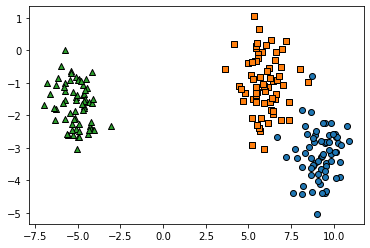

In [13]:
# Draw Scatter plot to check clustering dist.
target_list = np.unique(y)

markers=['o', 's', '^']

for target in target_list:
    target_cluster = cluster_df[cluster_df['target']==target]
    plt.scatter(x=target_cluster['ftr1'], y=target_cluster['ftr2'], edgecolor='k', marker=markers[target] )
plt.show()

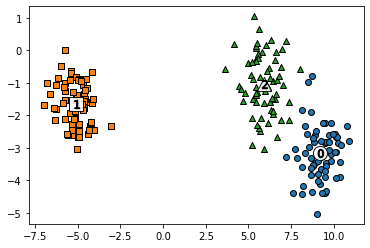

In [14]:
# Execute K-Means Clustering
kmeans = KMeans(n_clusters=3, max_iter=200)
cluster_labels = kmeans.fit_predict(X)
cluster_df['kmeans_label'] = cluster_labels

# Extract cluster_centers to visualize clustering centroid 
centers = kmeans.cluster_centers_
unique_labels = np.unique(cluster_labels)
markers=['o', 's', '^']

# Draw Scatter Plot
for label in unique_labels:
    label_cluster = cluster_df[cluster_df['kmeans_label']==label]
    center_x_y = centers[label]
    plt.scatter(x=label_cluster['ftr1'], y=label_cluster['ftr2'], edgecolor='k', 
                marker=markers[label] )
    
    # visualize clustering centroid 
    plt.scatter(x=center_x_y[0], y=center_x_y[1], s=200, color='white',
                alpha=0.9, edgecolor='k', marker=markers[label])
    plt.scatter(x=center_x_y[0], y=center_x_y[1], s=70, color='k', edgecolor='k', 
                marker='$%d$' % label)

plt.show()

In [15]:
cluster_df.groupby(['target','kmeans_label'])['ftr1'].count()

target  kmeans_label
0       0               66
        2                1
1       0                1
        2               66
2       1               66
Name: ftr1, dtype: int64

In [16]:
print(cluster_df.groupby('target')['kmeans_label'].value_counts())

target  kmeans_label
0       0               66
        2                1
1       2               66
        0                1
2       1               66
Name: kmeans_label, dtype: int64
